## Fetching Dataset from sklearn's dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
x = mnist['data']
y = mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

## Bringing in the library matplotlib to view our image

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x[360]
some_digit_image = some_digit.reshape(28,28)

## checking out some random image at x[#any_value<=70000] with axis off

(-0.5, 27.5, 27.5, -0.5)

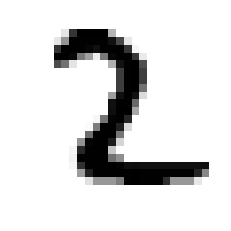

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off') 

In [10]:
y[360]

'2'

In [11]:
x_train = x[:600]
x_test = x[600:1200]

In [12]:
y_train = y[:600]
y_test = y[600:1200]

In [14]:
import numpy as np
index = np.random.permutation(600)
x_train,y_train = x_train[index] , y_train[index]

## Creating a digit detector for exmaple taking 2

In [22]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train2 = (y_train==2)
y_test2 = (y_test==2)

In [23]:
y_train2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
y_test2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Traning model via supervised learning using Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
modal = LogisticRegression(tol=0.1)

In [28]:
modal.fit(x_train,y_train2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [29]:
modal.predict([some_digit])

array([ True])

## Here now we validate our pediction

In [38]:
from sklearn.model_selection import cross_val_score
arr = cross_val_score(modal,x_train,y_train2,cv=3,scoring = 'accuracy')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
print(arr.mean(),'%')

0.9600408760219006 %
